In [76]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix

In [58]:
data = datasets.load_iris()

In [59]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [60]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [61]:
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
y = pd.Series(data.target) # the Iris class
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [63]:
mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [64]:
y = y.map(mapping)
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

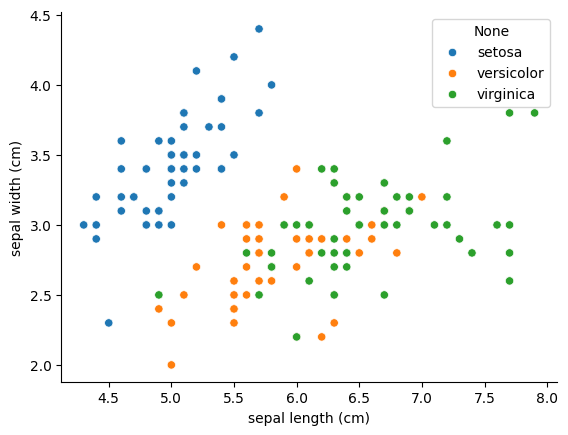

In [65]:
sns.scatterplot(data=X, x='sepal length (cm)', y='sepal width (cm)', hue=y)
sns.despine()

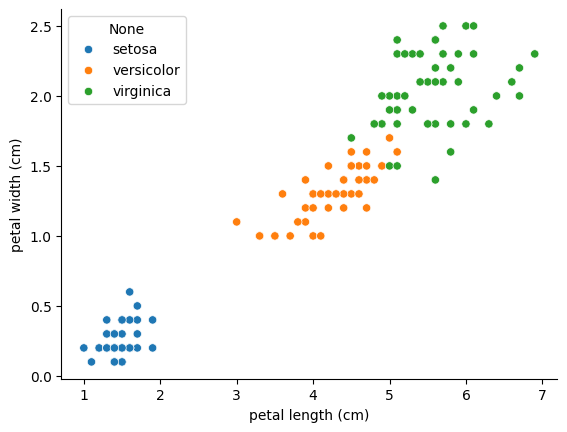

In [66]:
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue=y)
sns.despine()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, train_size=0.8)

In [68]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)

In [70]:
knn.fit(X_train[['sepal length (cm)', 'sepal width (cm)']], y_train)

KNeighborsClassifier()

In [72]:
preds = knn.predict(X_test[['sepal length (cm)', 'sepal width (cm)']])
preds[:5]

array(['setosa', 'virginica', 'setosa', 'setosa', 'virginica'],
      dtype=object)

In [73]:
y_test[:5] # Our model got the first 5 values correct

4         setosa
116    virginica
2         setosa
23        setosa
123    virginica
dtype: object

In [75]:
accuracy_score(y_test, preds) # About 73% accuracy in our predictions

0.7333333333333333

In [77]:
# Create a confusion matrix
confusion_matrix(y_test, preds) 

# y_test on top, preds on the left (split by each class, Setosa on top row and left-most column)
# i.e., row 2, column 3 interpet as "5 true Virginica were predicted incorrectly as Versicolor"

array([[9, 0, 0],
       [0, 5, 5],
       [0, 3, 8]])

In [82]:
mapping_2 = {'setosa': 0, 'versicolor': 1, 'virginica': 2} # Map back to numerical data

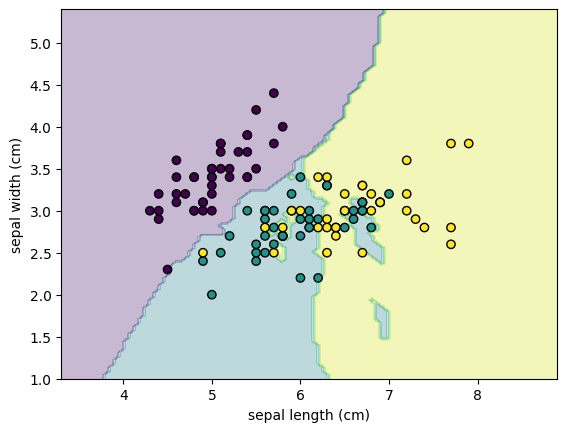

In [87]:
disp = DecisionBoundaryDisplay.from_estimator(
    knn, 
    X_train[['sepal length (cm)', 'sepal width (cm)']],
    response_method= 'predict',
    xlabel= 'sepal length (cm)',
    ylabel= 'sepal width (cm)',
    alpha = 0.3
)

disp.ax_.scatter(X_train['sepal length (cm)'],
                 X_train['sepal width (cm)'],
                 c = y_train.map(mapping_2),
                 edgecolors='black'
                 )